In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


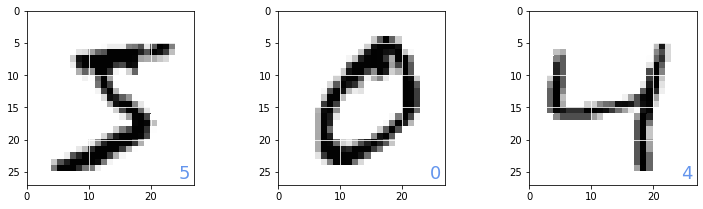

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
  plt.subplot(1, 3, id + 1)
  img = x_train[id, :, :]
  plt.pcolor(255 - img)
  plt.text(24.5,26, "%d" % y_train[id], color='cornflowerblue', fontsize=18)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.grid('on', color='white')
plt.show()

In [3]:
print("x_train shape {0}".format(x_train.shape))
print("y_train shape {0}".format(y_train.shape))
print("x_test shape {0}".format(x_test.shape))
print("y_test shape {0}".format(y_test.shape))

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
from keras.utils import np_utils
x_train = x_train.reshape(60000, 28* 28) ## flatten
x_train = x_train.astype('float32') ## int -> float
x_train = x_train / 255 ## normalize ( 0~ 255 float -> 0~1 float)
num_classes = 10 ## 클래스 개수
print(y_train[1]) ## 0 ~ 9 정수
y_train = np_utils.to_categorical(y_train, num_classes) ## 1- of K 부호화법으로 변경 
print(y_train[1]) ## 1- of K 부호화법
x_test = x_test.reshape(10000, 28* 28) ## flatten
x_test = x_test.astype('float32') ## int -> float
x_test = x_test / 255 ## normalize
y_test = np_utils.to_categorical(y_test, num_classes) ## 1- of K 부호화법으로 변경

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


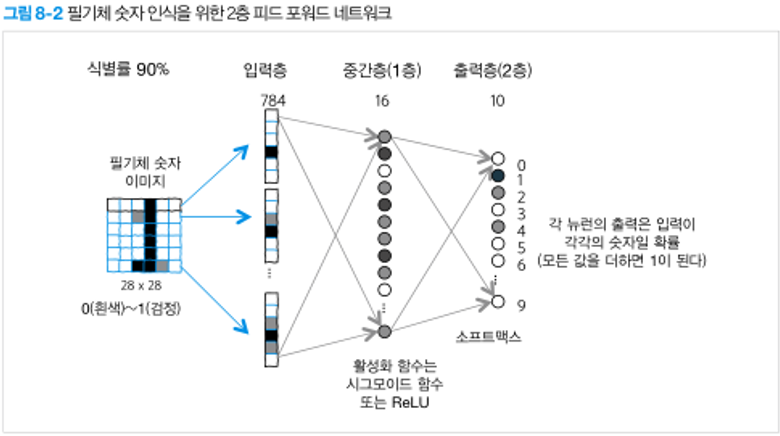

In [5]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim= 28 * 28, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [6]:
import time
startTime = time.time()
history = model.fit(x_train, y_train, epochs=15, batch_size=1000, verbose= 1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0: 3f} sec".format(time.time()- startTime))

Epoch 1/15
60/60 [==============================] - 15s 15ms/step - loss: 2.2129 - accuracy: 0.2737 - val_loss: 1.7896 - val_accuracy: 0.5884
Epoch 2/15
60/60 [==============================] - 0s 8ms/step - loss: 1.7048 - accuracy: 0.6271 - val_loss: 1.4546 - val_accuracy: 0.7349
Epoch 3/15
60/60 [==============================] - 0s 7ms/step - loss: 1.3948 - accuracy: 0.7576 - val_loss: 1.1973 - val_accuracy: 0.8146
Epoch 4/15
60/60 [==============================] - 0s 8ms/step - loss: 1.1549 - accuracy: 0.8173 - val_loss: 0.9988 - val_accuracy: 0.8503
Epoch 5/15
60/60 [==============================] - 0s 7ms/step - loss: 0.9720 - accuracy: 0.8466 - val_loss: 0.8496 - val_accuracy: 0.8691
Epoch 6/15
60/60 [==============================] - 0s 7ms/step - loss: 0.8309 - accuracy: 0.8633 - val_loss: 0.7369 - val_accuracy: 0.8811
Epoch 7/15
60/60 [==============================] - 0s 7ms/step - loss: 0.7249 - accuracy: 0.8747 - val_loss: 0.6531 - val_accuracy: 0.8862
Epoch 8/15
60/60 [

여태까지 전체 데이터 셋에 대한 오차 함수의 기울기를 갱신 1단계마다 계산하고 있었지만 데이터가 큰 경우 많은 시간이 걸리기 때문에 데이터의 일부로 오차 함수의 기울기를 계산하는 확률적 경사 하강법이 사용된다.

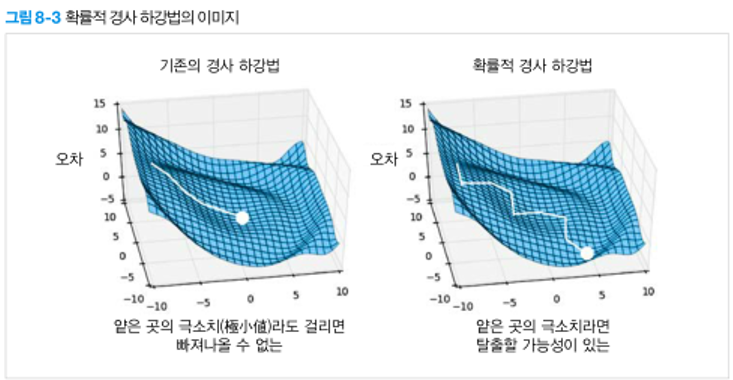

**batch_size와 epochs의 관계**   
batch_size: 1회 갱신에 사용하는 데이터의 크기  
epochs: 학습 갱신 횟수  
- 60000개 훈련데이터
- batch_size 1000
- 60회 동안 매개변수가 갱신 -> 1epochs


-> 1 epoch = 총 훈련 데이터 / batch_size = 매개변수 갱신 횟수

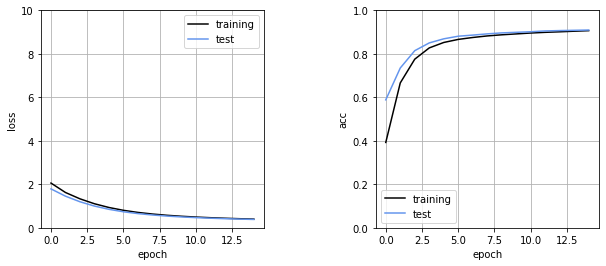

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

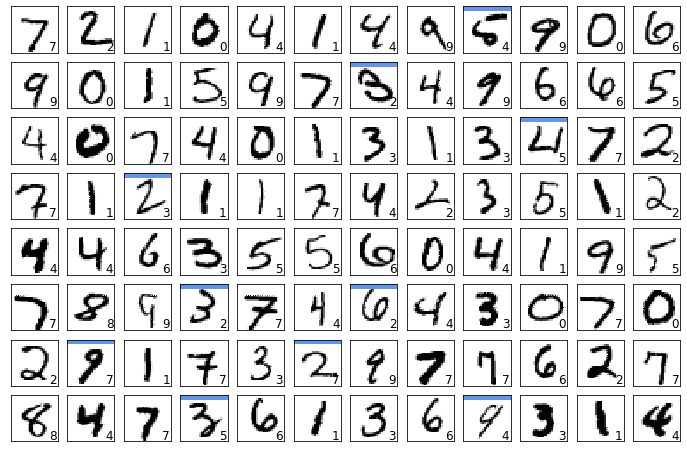

In [8]:
def show_prediction():
  n_show = 96
  y = model.predict(x_test)
  plt.figure(2, figsize=(12, 8))
  plt.gray()
  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1- x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize= 12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
show_prediction()
plt.show()

시그모이드 함수의 단점
- x가 어느정도 커지면 항상 1에 가까이 수렴
  - 입력의 변화가 출력에 반영이 되기 어려움
  - 오차함수의 가중치 매개 변수의 편미분이 0이 되는 문제 발생

위에서 활성화 함수를 시그모이드를 사용했는데 이제 ReLU를 사용하겠습니다.

ReLU의 장점
- 입력이 양수이면 학습의 정체 문제 해결
- 계산이 빠르다 max(0, x)

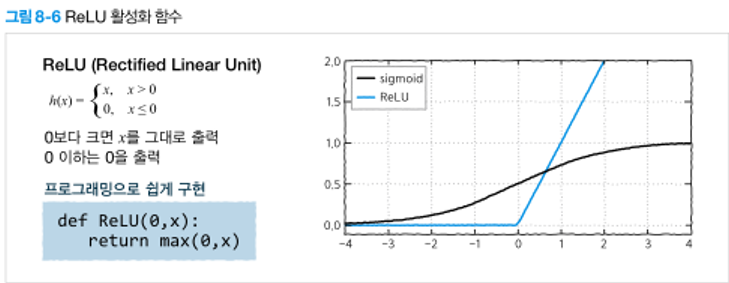

In [9]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim= 28 * 28, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

import time
startTime = time.time()
history = model.fit(x_train, y_train, epochs=15, batch_size=1000, verbose= 1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0: 3f} sec".format(time.time()- startTime))

Epoch 1/15
60/60 [==============================] - 2s 11ms/step - loss: 1.9091 - accuracy: 0.3605 - val_loss: 0.8479 - val_accuracy: 0.8185
Epoch 2/15
60/60 [==============================] - 0s 7ms/step - loss: 0.7348 - accuracy: 0.8308 - val_loss: 0.4827 - val_accuracy: 0.8833
Epoch 3/15
60/60 [==============================] - 0s 7ms/step - loss: 0.4668 - accuracy: 0.8836 - val_loss: 0.3786 - val_accuracy: 0.9076
Epoch 4/15
60/60 [==============================] - 0s 7ms/step - loss: 0.3736 - accuracy: 0.9040 - val_loss: 0.3287 - val_accuracy: 0.9171
Epoch 5/15
60/60 [==============================] - 0s 7ms/step - loss: 0.3259 - accuracy: 0.9120 - val_loss: 0.3008 - val_accuracy: 0.9218
Epoch 6/15
60/60 [==============================] - 0s 8ms/step - loss: 0.3066 - accuracy: 0.9157 - val_loss: 0.2808 - val_accuracy: 0.9250
Epoch 7/15
60/60 [==============================] - 0s 8ms/step - loss: 0.2852 - accuracy: 0.9227 - val_loss: 0.2678 - val_accuracy: 0.9267
Epoch 8/15
60/60 [=

시그모이드 대신 relu를 사용하였더니 loss, 정확도 시간 향상되었다.

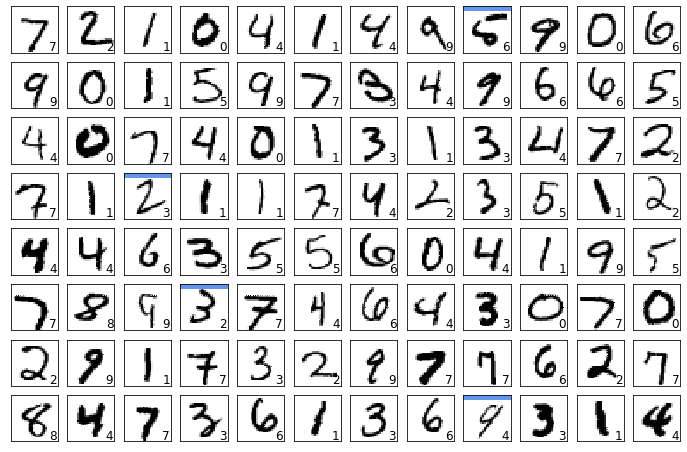

In [10]:
show_prediction()
plt.show()

가중치를 한번 그림으로 나타내보겠다

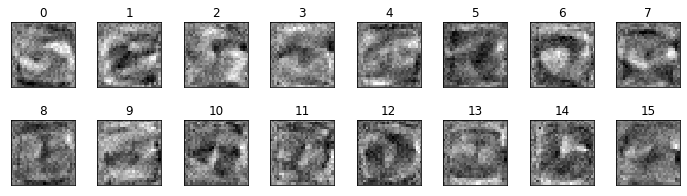

In [12]:
w = model.layers[0].get_weights()[0] ##네트워크의 중간층 가중치 매개변수
plt.figure(1, figsize = (12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
  plt.subplot(2, 8, i + 1)
  w1 = w[:, i]
  w1 = w1.reshape(28, 28)
  plt.pcolor(-w1)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" %i)
plt.show()

**중간층 뉴런에 대한 가중치 그림**
- 검은색 부분은 양의 값, 흰색 부분은 음의 값
- 검은 부분에 입력 이미지가 있으면 활성화
- 흰색 부분에 입력 이미지가 있으면 억제

##모델의 성능을 추가적으로 더 높이기


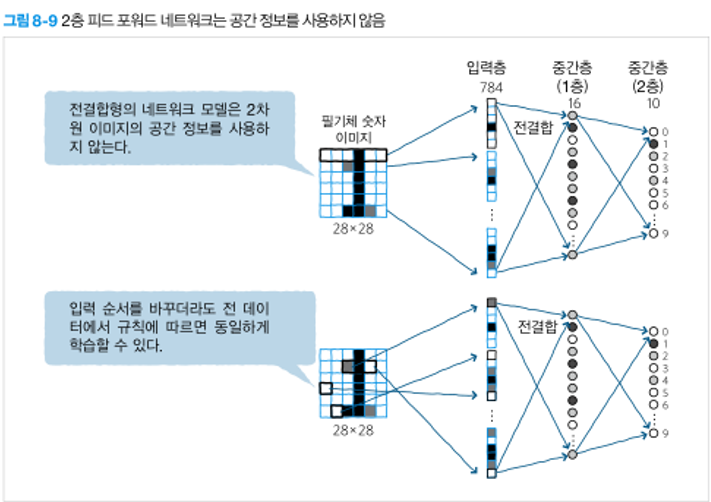

FC Layer는 모든 입력 성분이 대등한 관계이기 때문에 공간정보가 활용되고 있지 않는다.
- 중간층의 노드가 입력 전체의 데이터를 요구하기 때문

->공간 정보를 사용하기 위해 공간 필터 사용

##합성곱 연산

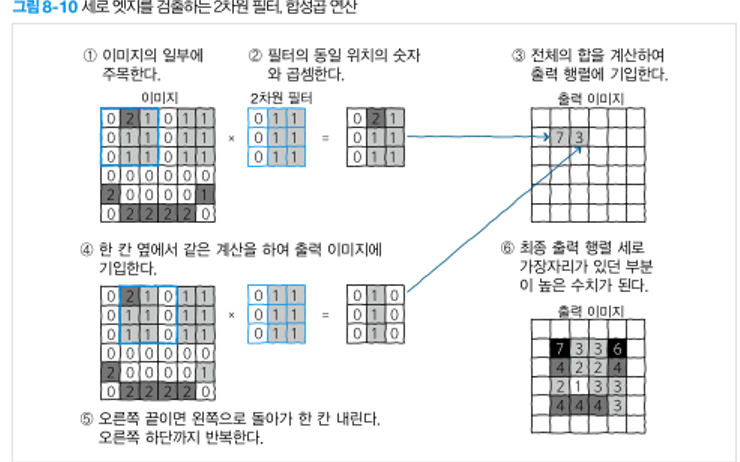

3 x 3 필터 합성곱 연산

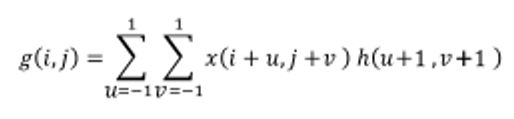

In [13]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [14]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1) ## flatten
x_train = x_train.astype('float32') ## int -> float
x_train = x_train / 255 ## normalize ( 0~ 255 float -> 0~1 float)
num_classes = 10 ## 클래스 개수
print(y_train[1]) ## 0 ~ 9 정수
y_train = np_utils.to_categorical(y_train, num_classes) ## 1- of K 부호화법으로 변경 
print(y_train[1]) ## 1- of K 부호화법
x_test = x_test.reshape(10000, 28, 28,1) ## flatten
x_test = x_test.astype('float32') ## int -> float
x_test = x_test / 255 ## normalize
y_test = np_utils.to_categorical(y_test, num_classes) ## 1- of K 부호화법으로 변경

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
print("x_train shape {0}".format(x_train.shape))
print("y_train shape {0}".format(y_train.shape))
print("x_test shape {0}".format(x_test.shape))
print("y_test shape {0}".format(y_test.shape))

x_train shape (60000, 28, 28, 1)
y_train shape (60000, 10)
x_test shape (10000, 28, 28, 1)
y_test shape (10000, 10)


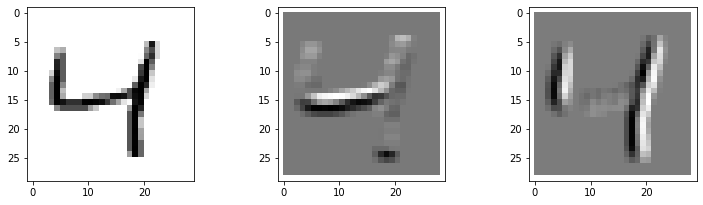

In [18]:
import matplotlib.pyplot as plt
id_img = 2
myfil1 = np.array([[1, 1, 1], ## 필터 1: 가로 라인의 아래쪽 강조
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) 
myfil2 = np.array([[-2, 1, 1],  ## 필터 2: 세로 라인의 왼쪽 강조 
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float)

x_img = x_train[id_img, :, :, 0] ## 원본 이미지
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

## 합성곱 연산
for ih in range(img_h - 3): ## zero padding x 때문
  for iw in range(img_w - 3): ## zero padding x 때문
    img_part = x_img[ih:ih + 3, iw: iw+3] ## 연산을 해야되는 이미지 부분 불러오기
    out_img1[ih + 1, iw +1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1)) ## 합성곱연산
    out_img2[ih + 1, iw +1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1)) ## 합성곱 연산

plt.figure(1, figsize= (12, 3.2))
plt.subplots_adjust(wspace= 0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

1. 원본이미지
  - 흰색: 0 , 검은색: 1
2. 필터 이미지
  - 흰색: 작은 값, 검은색: 큰값
  - 모든 요소를 합하면 0이 된다.
    - 추출할 구조가 없는 부분은 0 반환
    - 추출할 구조가 있는 경우 0 이상의 값 반환
      - 0을 감지 레벨의 기준으로 삼기 가능

위에서 출력 이미지가 줄어들었다. 이를 막고 싶으면 패딩을 사용하면 된다.

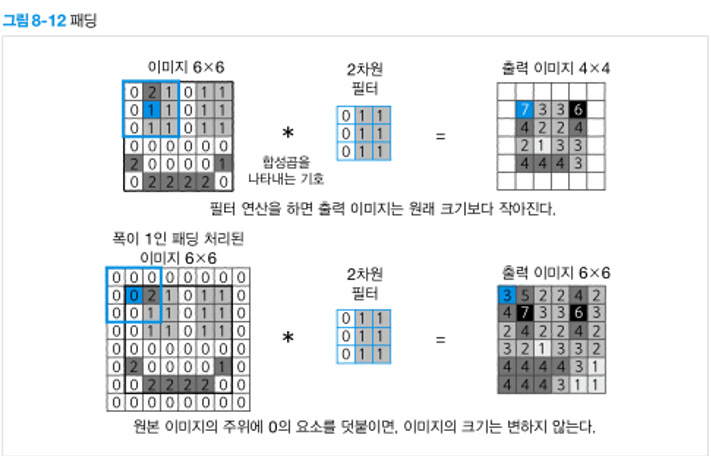

이 외에도 stride라는 필터 처리 관련된 매개변수가 있다. 이는 필터를 몇칸씩 이동할지 결정하는 매개변수이다.

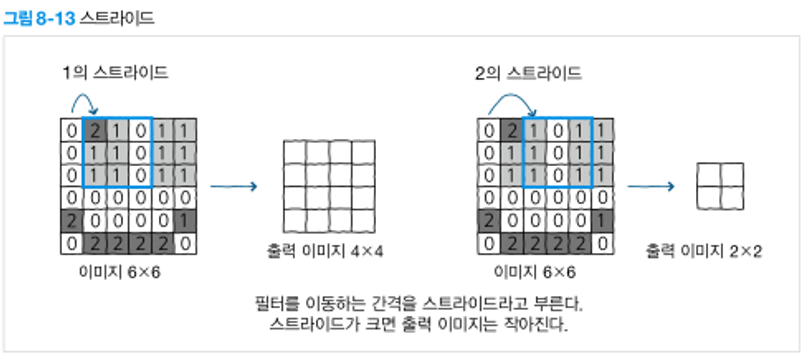

##합성곱 신경망

공간정보를 활용하여 FC layer 모델보다 더 뛰어난 성능의 모델을 만들어 보겠다

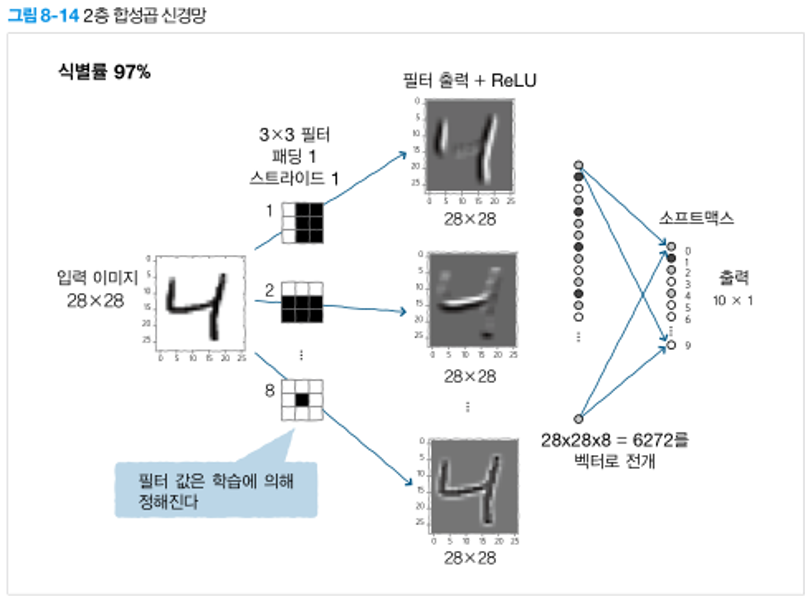

In [22]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

import time
startTime = time.time()
history = model.fit(x_train, y_train, epochs=15, batch_size=1000, verbose= 1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0: 3f} sec".format(time.time()- startTime))

Epoch 1/15
60/60 [==============================] - 12s 177ms/step - loss: 1.3393 - accuracy: 0.6589 - val_loss: 0.3516 - val_accuracy: 0.9024
Epoch 2/15
60/60 [==============================] - 10s 174ms/step - loss: 0.3366 - accuracy: 0.9032 - val_loss: 0.2731 - val_accuracy: 0.9206
Epoch 3/15
60/60 [==============================] - 11s 176ms/step - loss: 0.2684 - accuracy: 0.9229 - val_loss: 0.2332 - val_accuracy: 0.9333
Epoch 4/15
60/60 [==============================] - 10s 175ms/step - loss: 0.2269 - accuracy: 0.9359 - val_loss: 0.2018 - val_accuracy: 0.9436
Epoch 5/15
60/60 [==============================] - 11s 175ms/step - loss: 0.1939 - accuracy: 0.9454 - val_loss: 0.1724 - val_accuracy: 0.9517
Epoch 6/15
60/60 [==============================] - 10s 174ms/step - loss: 0.1680 - accuracy: 0.9527 - val_loss: 0.1505 - val_accuracy: 0.9587
Epoch 7/15
60/60 [==============================] - 10s 174ms/step - loss: 0.1490 - accuracy: 0.9586 - val_loss: 0.1327 - val_accuracy: 0.9637

성능이 97%로 향상되었다.



```
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
```
- 8, (3, 3): 3x3필터를 8개 사용
- padding ='same': 출력 크기 유지용 패딩 추가
- input_shape(28, 28, 1): 입력 이미지의 크기
- activation='relu': 활성화 함수를 relu로 설정
- 바이어스 입력은 각 필터에 1변수씩 할당  


conv2D의 출력
- 4차원
  - 배치수
  - 필터 수
  - 출력 이미지의 세로폭
  - 출력 이미지의 가로폭 

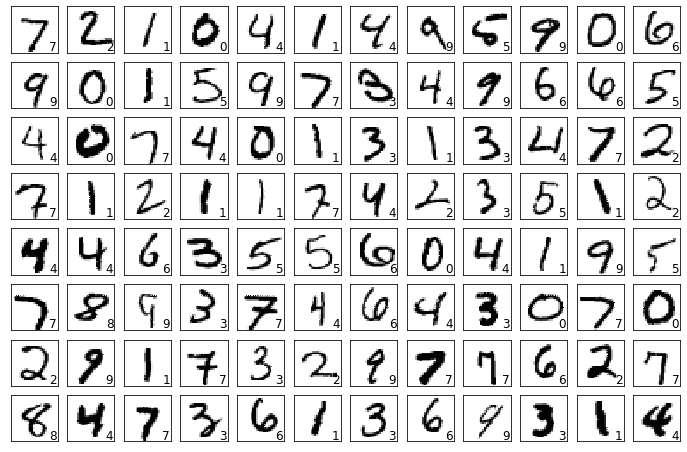

In [23]:
def show_prediction():
  n_show = 96
  y = model.predict(x_test)
  plt.figure(2, figsize=(12, 8))
  plt.gray()
  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1- x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize= 12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
show_prediction()
plt.show()

학습에서 얻은 8장의 필터를 살펴보자

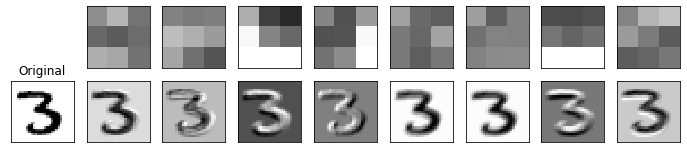

In [27]:
plt.figure(1, figsize= (12, 2.5))
plt.gray()
plt.subplots_adjust(wspace= 0.2, hspace= 0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_train[id_img, :, :, 0] ## 원본 이미지
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(- x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0] ## weight 불러오기
max_w = np.max(w)
min_w = np.min(w)
for i in range(8): ## 필터 시각화
  plt.subplot(2, 9, i+ 2)
  w1 = w[:, :, 0, i]
  w1 = w1.reshape(3, 3)
  plt.pcolor(-w1, vmin=min_w, vmax=max_w)
  plt.xlim(0, 3)
  plt.ylim(3, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.subplot(2, 9, i + 11)
  out_img = np.zeros_like(x_img)

  for ih in range(img_h- 3): ## 이미지에 필터 씌우기
    for iw in range(img_w - 3):
      img_part = x_img[ih:ih + 3, iw:iw + 3]
      out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
  plt.pcolor(-out_img)
  plt.xlim(0, img_w)
  plt.ylim(img_h, 0)
  plt.xticks([], "")
  plt.yticks([], "")
plt.show()

1행 그림은 학습으로 얻은 필터이미지  
2행 그림은 이미지에 필터를 씌운 이미지

의의 : 필터가 자동으로 학습된다.

## 풀링

**풀링연산의 필요성**  
conv는 픽셀단위의 연산이기 때문에 이미지의 위치의 어긋남에 대한 견고성이 필요



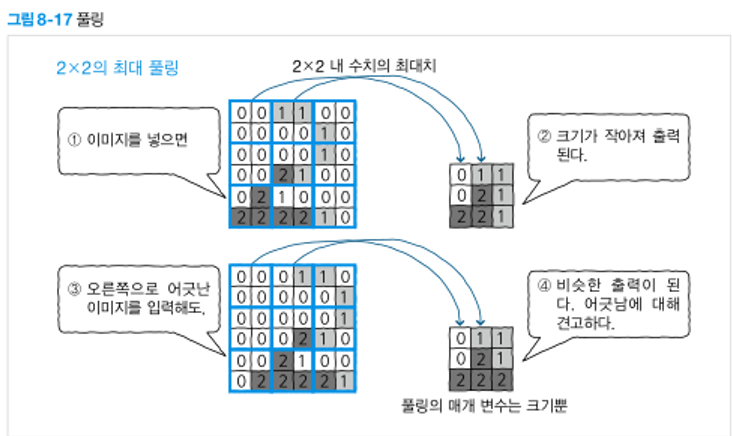

## 드롭아웃

드롭아웃: 학습 시 입력층 유닛과 중간층 뉴런을 확률에 따라 임의로 선택하여 나머지를 무효화 시키는 방법  
기능: 여러 네트워크를 각각 학습시켜 예측시에 네트워크를 평균화해 합치는 효과가 있다.

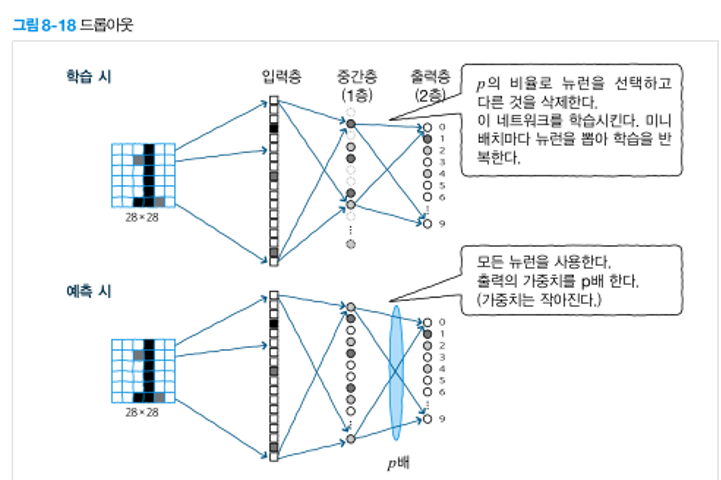

특이점: 예측 시 전체 참가를 하면 1/p배 만큼 출력이 커진다.  
해결: 출력에 p를 곱하면 된다.

이제 위에서 언급한 내용을 전부 모델이 집어넣어 보겠다.

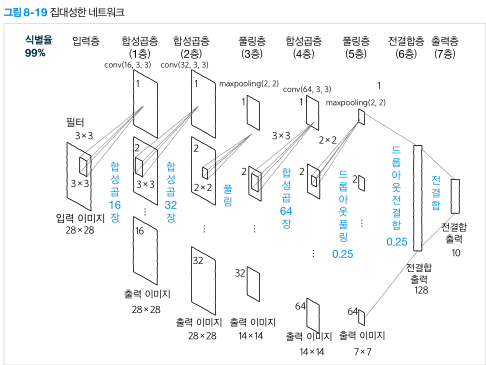

In [28]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, epochs=15, batch_size=1000, verbose= 1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0: 3f} sec".format(time.time()- startTime))

Epoch 1/15
60/60 [==============================] - 73s 1s/step - loss: 1.2088 - accuracy: 0.6110 - val_loss: 0.1276 - val_accuracy: 0.9612
Epoch 2/15
60/60 [==============================] - 71s 1s/step - loss: 0.1565 - accuracy: 0.9523 - val_loss: 0.0629 - val_accuracy: 0.9792
Epoch 3/15
60/60 [==============================] - 72s 1s/step - loss: 0.0948 - accuracy: 0.9713 - val_loss: 0.0486 - val_accuracy: 0.9840
Epoch 4/15
60/60 [==============================] - 72s 1s/step - loss: 0.0755 - accuracy: 0.9778 - val_loss: 0.0392 - val_accuracy: 0.9865
Epoch 5/15
60/60 [==============================] - 72s 1s/step - loss: 0.0597 - accuracy: 0.9812 - val_loss: 0.0326 - val_accuracy: 0.9892
Epoch 6/15
60/60 [==============================] - 71s 1s/step - loss: 0.0492 - accuracy: 0.9840 - val_loss: 0.0302 - val_accuracy: 0.9892
Epoch 7/15
60/60 [==============================] - 72s 1s/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0301 - val_accuracy: 0.9896
Epoch 8/15
60/60 [==

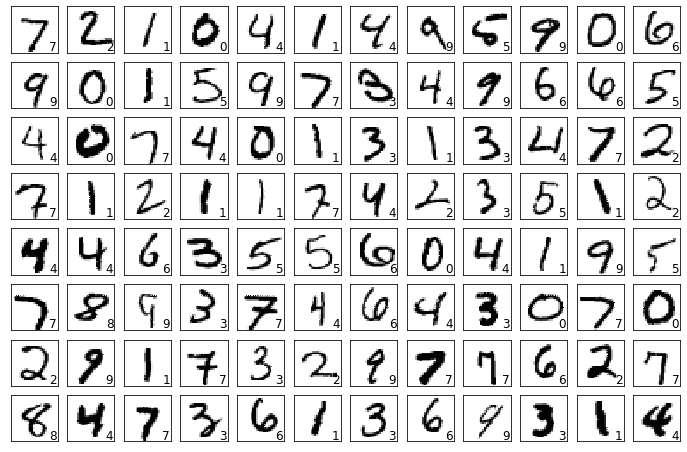

In [29]:
show_prediction()
plt.show()